## Step by Step Machine Learning Project Workflow

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Step_1 Load and Understand data


In [13]:
df=pd.read_csv('data.csv')
print("Sample Rows:")
print(df.head())

print("\nDateSet Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nDataSet Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe(include='all'))

print("\nMissing Values")
print(df.isnull().sum())

Sample Rows:
   StudyHours  Attendance  PastScore Internet  SleepHours Passed
0           2          60         40      Yes           5     No
1           5          80         60       No           6    Yes
2           8          90         75      Yes           8    Yes
3           3          70         50      Yes           5     No
4           7          85         70       No           7    Yes

DateSet Shape:
Rows: 20, Columns: 6

DataSet Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None

Statistical Summary:
        StudyHours  Attendance  PastScore Inte

### Step_2 Data Preprocessing(Clean Data)

In [26]:

le = LabelEncoder()
df=pd.read_csv('data.csv')

print("Missing values in each column:")
print(df.isnull().sum())

le=LabelEncoder()
df['Internet']=le.fit_transform(df['Internet'])
df['Passed']=le.fit_transform(df['Passed']) 
 

Missing values in each column:
StudyHours    0
Attendance    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64


### Step 3  Feature Scaling

In [39]:
features=['StudyHours','Attendance','PastScore','SleepHours']
scaler = StandardScaler()
df_scaled=df.copy()
df_scaled[features]=scaler.fit_transform(df[features] ) 


### Step_4 Spliting of Data


In [41]:
X=df_scaled[features]
y=df_scaled['Passed']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Step_5 Train of Model

Accuracy: 100.0

Confusion Matrix:
[[1 0]
 [0 3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



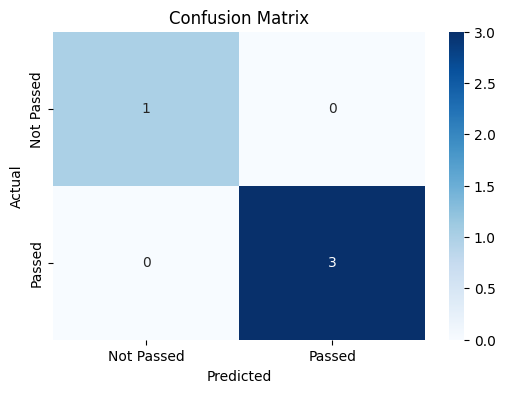

-------Predict your Results-------
The student is likely to PASS.


c:\Users\vraj8\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\vraj8\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred)*100)
print("\nConfusion Matrix:")
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Not Passed','Passed'],yticklabels=['Not Passed','Passed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("-------Predict your Results-------")
# The model was trained on these 4 features: StudyHours, Attendance, PastScore, SleepHours
study_hours=float(input("Enter Study Hours: "))
attendance=float(input("Enter Attendance Percentage: "))
past_score=float(input("Enter Past Score: "))
sleep_hours=float(input("Enter Sleep Hours: "))

input_data=np.array([[study_hours,attendance,past_score,sleep_hours]])
input_data_scaled=scaler.transform(input_data)
prediction=model.predict(input_data_scaled)
if prediction[0]==1:
    print("The student is likely to PASS.")
else:
    print("The student is likely to FAIL.")
